In [2]:
import json
import urllib.request as ur
from tqdm.notebook import tqdm

import numpy as np
import pandas as pd
import lmfit
import scipy.stats as sts
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.feature_selection import chi2

from matplotlib import pyplot as plt
from matplotlib import cm
import matplotlib.ticker as mtick

from IPython.display import display, Markdown

In [3]:
def gompertz_function(x, a, b, k, e):
    exp = - np.exp(k * (b - x))
    return a * np.exp(exp) + e

def double_gompertz_function(x, a1, b1, k1, a2, b2, k2, e):
    exp1 = - np.exp(k1 * (b1 - x))
    g1 = a1 * np.exp(exp1)
    exp2 = - np.exp(k2 * (b2 - x))
    g2 = (a2 - a1) * np.exp(exp2)
    return g1 + g2 + e

def logit_function(x, a, b, k, e):
    d = k * (b - np.array(x))
    return (a / (1 + np.exp(d))) + e

def double_logit_function(x, a1, b1, k1, a2, b2, k2, e):
    d1 = k1 * (b1 - np.array(x))
    l1 = a1 / (1 + np.exp(d1))
    d2 = k2 * (b2 - np.array(x))
    l2 = (a2 - a1) / (1 + np.exp(d2))
    return l1 + l2 + e

In [4]:
df = pd.read_pickle("data-confirmed-2020-04-29.pkl")

In [30]:
colors = ["b", "y", "r", "g"]

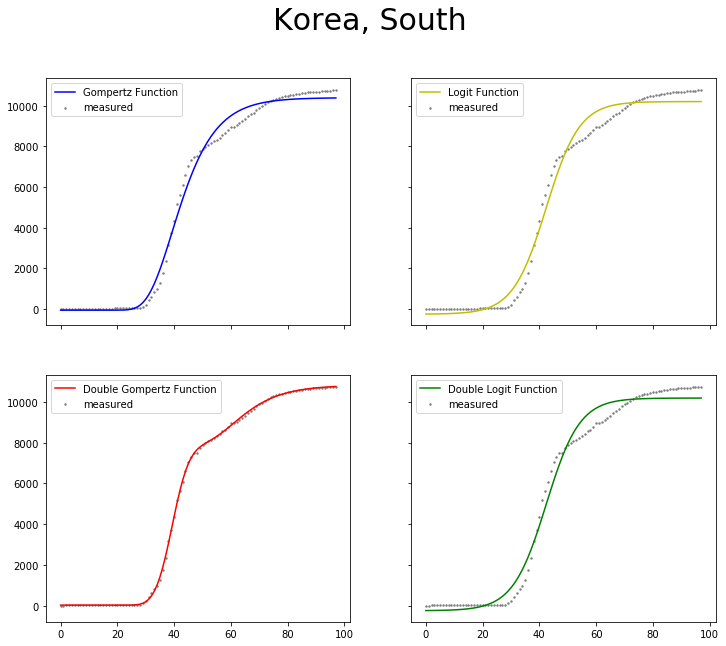

In [31]:
x = np.arange(0, 98)

country = "Korea, South"

fig, ax = plt.subplots(2, 2, figsize=(12, 10), sharey=True, sharex=True)

i = 0
for f in df.columns:
    if f == "measured":
        continue
    ax.flat[i].scatter(
        x,
        df["measured"][country],
        s=2, c="grey", label="measured"
    )
    ax.flat[i].plot(
        x,
        df[f][country].best_fit,
        label=f, c=colors[i]
    )
    ax.flat[i].legend(loc="best")
    i += 1
plt.suptitle(country, fontsize=30)
plt.show()

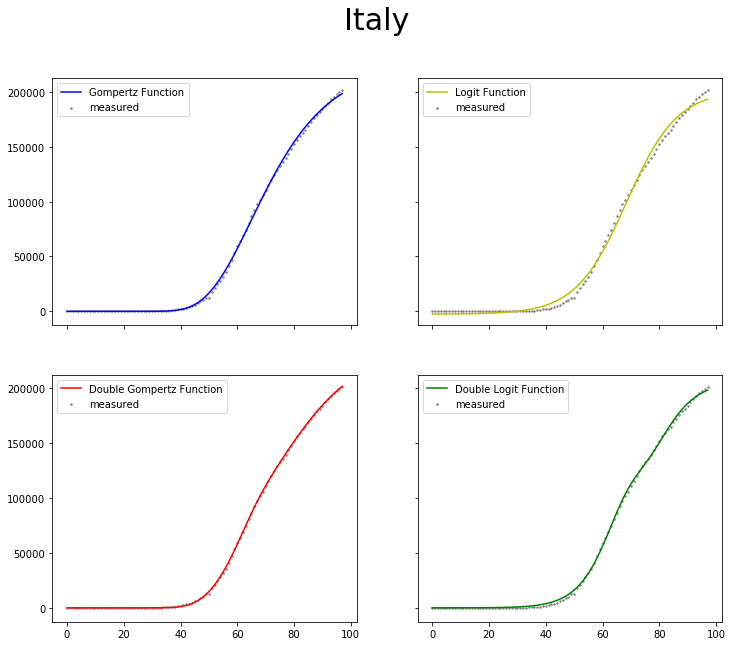

In [32]:
x = np.arange(0, 98)

country = "Italy"

fig, ax = plt.subplots(2, 2, figsize=(12, 10), sharey=True, sharex=True)

i = 0
for f in df.columns:
    if f == "measured":
        continue
    ax.flat[i].scatter(
        x,
        df["measured"][country],
        s=2, c="grey", label="measured"
    )
    ax.flat[i].plot(
        x,
        df[f][country].best_fit,
        label=f, c=colors[i]
    )
    ax.flat[i].legend(loc="best")
    i += 1
plt.suptitle(country, fontsize=30)
plt.show()

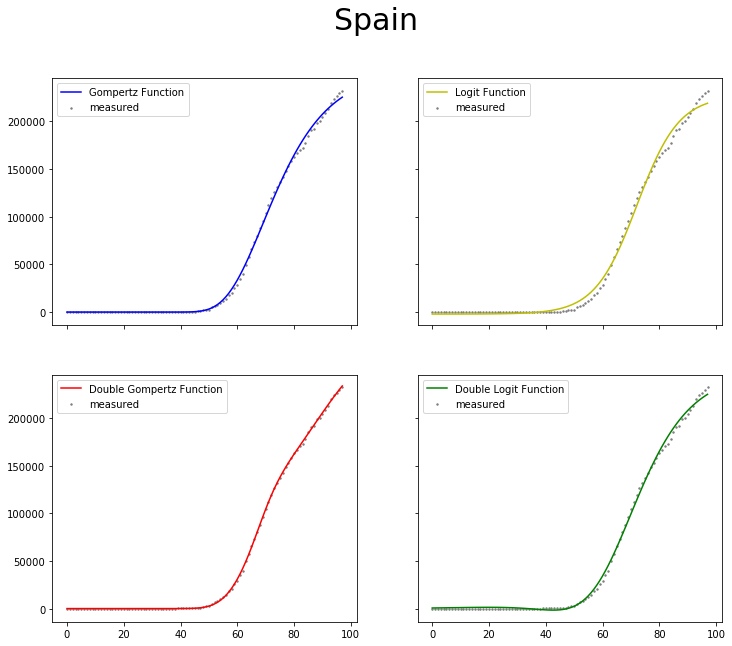

In [33]:
x = np.arange(0, 98)

country = "Spain"

fig, ax = plt.subplots(2, 2, figsize=(12, 10), sharey=True, sharex=True)

i = 0
for f in df.columns:
    if f == "measured":
        continue
    ax.flat[i].scatter(
        x,
        df["measured"][country],
        s=2, c="grey", label="measured"
    )
    ax.flat[i].plot(
        x,
        df[f][country].best_fit,
        label=f, c=colors[i]
    )
    ax.flat[i].legend(loc="best")
    i += 1
plt.suptitle(country, fontsize=30)
plt.show()

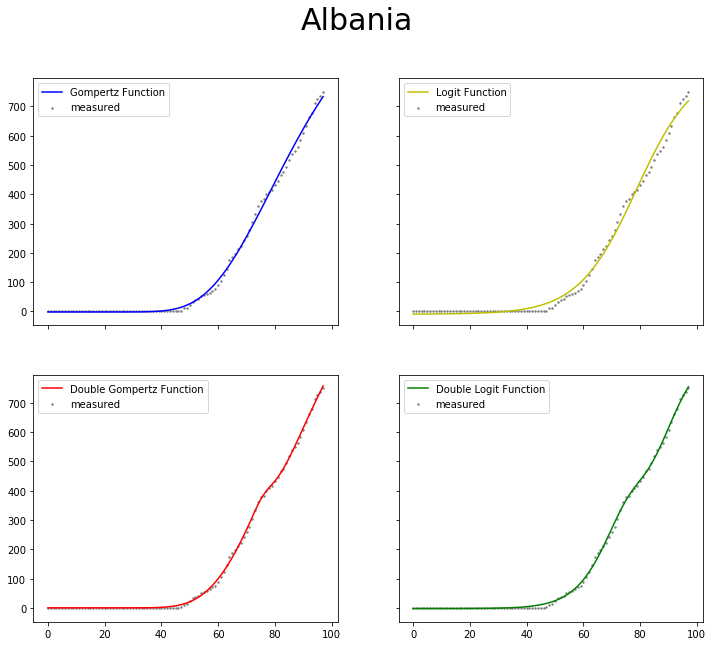

In [34]:
x = np.arange(0, 98)

country = "Albania"

fig, ax = plt.subplots(2, 2, figsize=(12, 10), sharey=True, sharex=True)

i = 0
for f in df.columns:
    if f == "measured":
        continue
    ax.flat[i].scatter(
        x,
        df["measured"][country],
        s=2, c="grey", label="measured"
    )
    ax.flat[i].plot(
        x,
        df[f][country].best_fit,
        label=f, c=colors[i]
    )
    ax.flat[i].legend(loc="best")
    i += 1
plt.suptitle(country, fontsize=30)
plt.show()

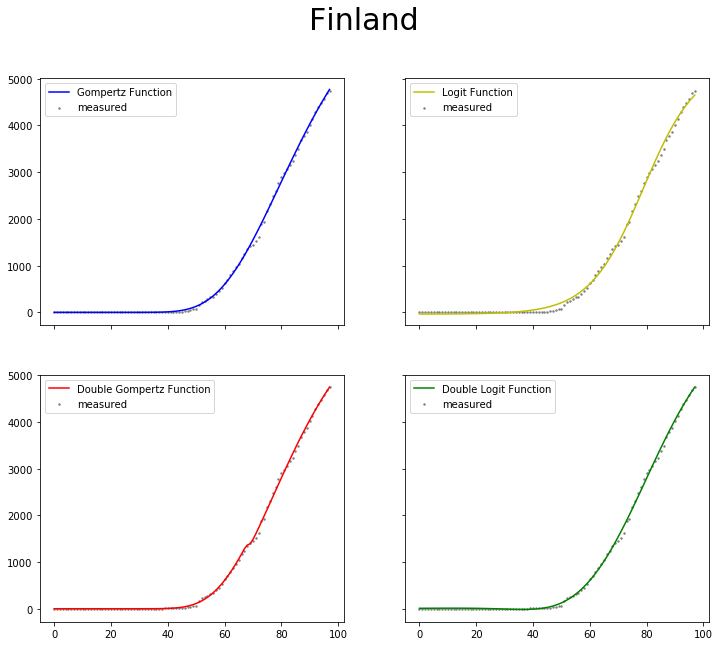

In [35]:
x = np.arange(0, 98)

country = "Finland"

fig, ax = plt.subplots(2, 2, figsize=(12, 10), sharey=True, sharex=True)

i = 0
for f in df.columns:
    if f == "measured":
        continue
    ax.flat[i].scatter(
        x,
        df["measured"][country],
        s=2, c="grey", label="measured"
    )
    ax.flat[i].plot(
        x,
        df[f][country].best_fit,
        label=f, c=colors[i]
    )
    ax.flat[i].legend(loc="best")
    i += 1
plt.suptitle(country, fontsize=30)
plt.show()

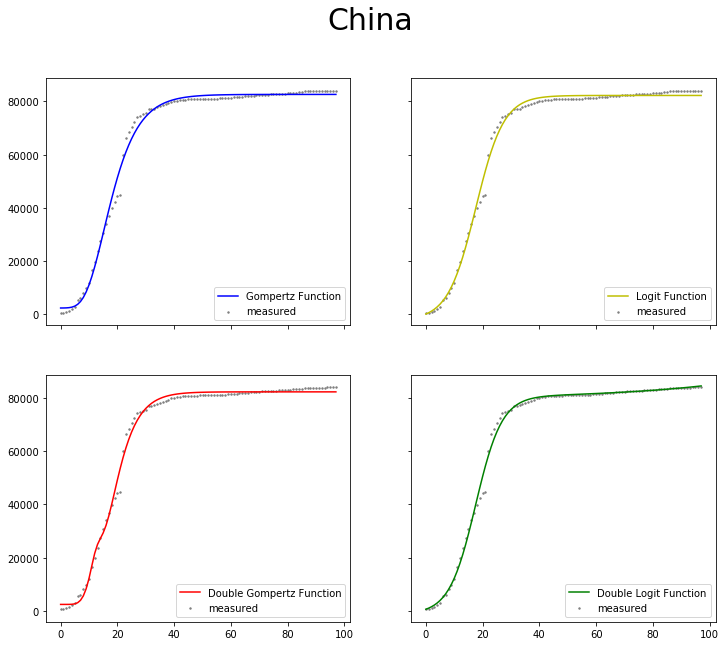

In [36]:
x = np.arange(0, 98)

country = "China"

fig, ax = plt.subplots(2, 2, figsize=(12, 10), sharey=True, sharex=True)

i = 0
for f in df.columns:
    if f == "measured":
        continue
    ax.flat[i].scatter(
        x,
        df["measured"][country],
        s=2, c="grey", label="measured"
    )
    ax.flat[i].plot(
        x,
        df[f][country].best_fit,
        label=f, c=colors[i]
    )
    ax.flat[i].legend(loc="best")
    i += 1
plt.suptitle(country, fontsize=30)
plt.show()